In [1]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [3]:
import collect_stats as cs

In [4]:
exp_folder = '/cluster/sj1/bb_opt/experiments/ensemble'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
num_tfs_to_test = 10
batches = [100]
num_acks = 10

In [5]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [6]:
arrs = {
    'o_none_ucb_c1.0_g0.0_' : None,
    'o_none_ucb_c2.0_g0.0_' : None,
    'o_none_ucb_c1.0_g0.1_': None,
    'o_none_ucb_c1.0_g0.5_' : None,
    'o_none_ucb_c1.0_g1.0_': None,
    'o_none_ucb_c1.0_g5.0_': None,
    'o_none_ucb_c1.0_g10.0_': None,
    'o_none_ucb_c1.0_g20.0_': None,
    }

In [7]:
for experiment in arrs:
    print('reading', experiment)
    arrs[experiment] = cs.get_data(exp_folder, experiment, batches, num_acks, num_samples=10)

reading o_none_ucb_c1.0_g0.0_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading o_none_ucb_c2.0_g0.0_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading o_none_ucb_c1.0_g0.1_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading o_none_ucb_c1.0_g0.5_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading o_none_ucb_c1.0_g1.0_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sampl

In [8]:
ack_iter = 9
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            if len(arrs[experiment]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            for stats in arrs[experiment]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                val_nll += stats[filename][batch_size][0]['logging'][5].min().item()
                if idx_frac is None:
                    idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                else:
                    idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
            if num_used > 0:
                idx_frac = idx_frac/num_used
                idx_frac = idx_frac.numpy()
                print(experiment + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")

GFI1_REF_R1_8mers.txt
o_none_ucb_c1.0_g0.0_: 0.253963 0.320134 0.243661 0.143624 ;  -8.03 val_nll ; 10 samples
o_none_ucb_c2.0_g0.0_: 0.263719 0.316788 0.241320 0.142940 ;  -8.16 val_nll ; 10 samples
o_none_ucb_c1.0_g0.1_: 0.273476 0.323540 0.245242 0.143943 ;  -8.38 val_nll ; 10 samples
o_none_ucb_c1.0_g0.5_: 0.245122 0.314112 0.239526 0.142301 ;  -7.82 val_nll ; 10 samples
o_none_ucb_c1.0_g1.0_: 0.283841 0.326034 0.243904 0.142742 ;  -7.83 val_nll ; 10 samples
o_none_ucb_c1.0_g5.0_: 0.287195 0.322019 0.242171 0.142620 ;  -7.84 val_nll ; 10 samples
o_none_ucb_c1.0_g10.0_: 0.246951 0.316910 0.242505 0.143061 ;  -8.24 val_nll ; 10 samples
o_none_ucb_c1.0_g20.0_: 0.187119 0.269009 0.207966 0.125855 ;  -8.29 val_nll ; 8 samples
HOXC4_R158L_R1_8mers.txt
o_none_ucb_c1.0_g0.0_: 0.947256 0.501399 0.288416 0.150342 ;  -9.83 val_nll ; 10 samples
o_none_ucb_c2.0_g0.0_: 0.926829 0.491910 0.285345 0.150129 ; -10.58 val_nll ; 10 samples
o_none_ucb_c1.0_g0.1_: 0.942988 0.499635 0.288233 0.150160 ; -

In [ ]:
ack_iter = 1
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            best_value = 0
            num_used = 0
            for stats in arrs[experiment]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                best_value += stats[filename][batch_size][ack_iter]['ack_labels'].max().item()
            if num_used > 0:
                best_value = best_value/num_used
                print(experiment + ":", best_value, ";", str(num_used), "samples")

CRX_REF_R1_8mers.txt


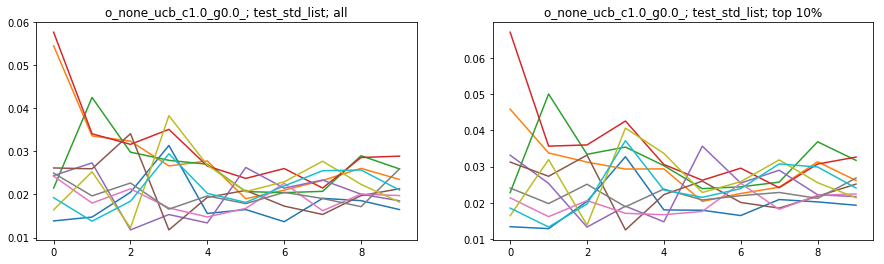

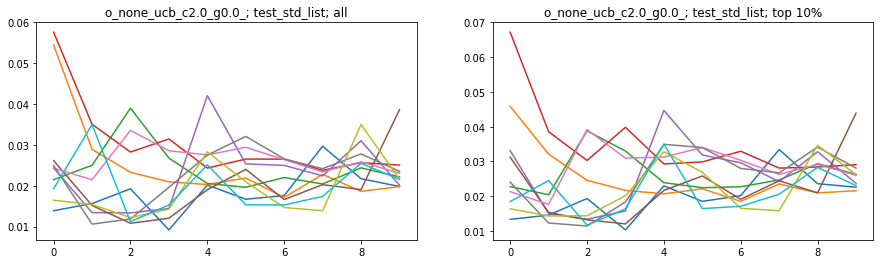

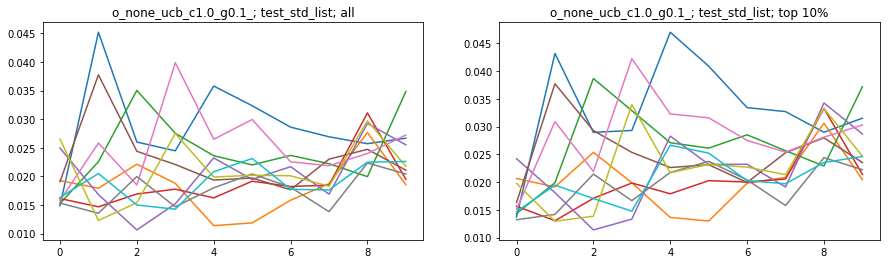

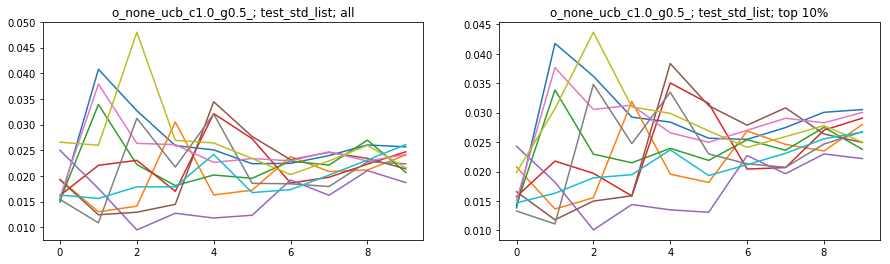

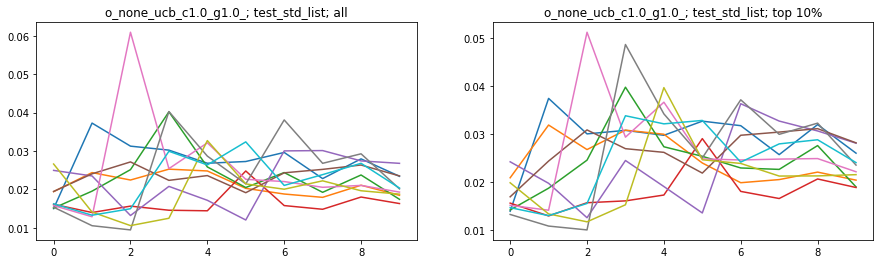

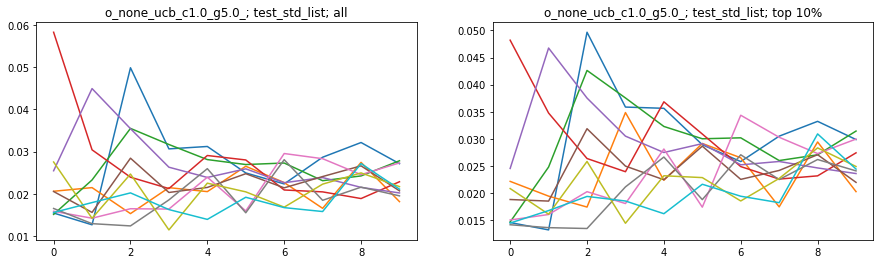

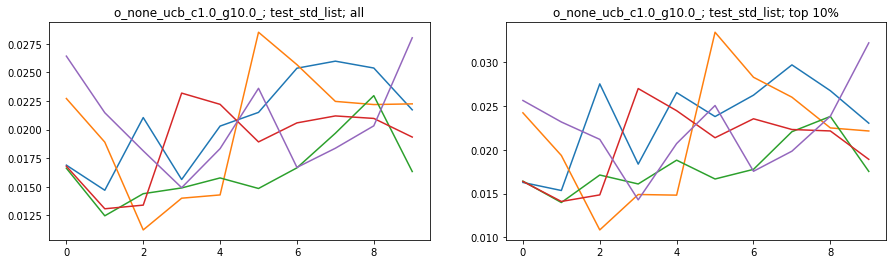

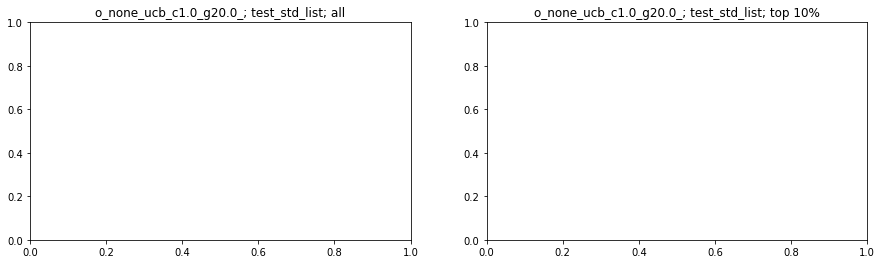

In [86]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

for prop in test_properties[3:4]:
    for filename in filenames[2:3]:
        print(filename)
        for batch_size in batches:
            for experiment in arrs:
                plt.figure(figsize=(15, 4))
                plt.subplot(121)
                for stats in arrs[experiment]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    prop_list = [stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)]
                    plt.plot(prop_list)
                plt.title(experiment + "; " + prop + "; all")
                plt.subplot(122)
                for stats in arrs[experiment]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    prop_list = [stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)]
                    plt.plot(prop_list)
                plt.title(experiment + "; " + prop + "; top 10%")

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][-1].numpy()
                plt.plot(prop_list)
                plt.title(experiment + "; " + str(ack_iter))

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][5].numpy()
                plt.plot(prop_list)
                plt.title(experiment + "; " + str(ack_iter))

In [99]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

ack_iter = 0
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            m = 0
            num_used = 0
            for stats in arrs[experiment]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                m += stats[filename][batch_size][ack_iter]['test_std_list'][0].item()
            if num_used > 0:
                print(experiment, ":", m/num_used, ";", num_used, "samples")

GFI1_REF_R1_8mers.txt
o_none_ucb_c1.0_g0.0_ : 0.027494763676077127 ; 10 samples
o_none_ucb_c2.0_g0.0_ : 0.027494763676077127 ; 10 samples
o_none_ucb_c1.0_g0.1_ : 0.025240202993154527 ; 10 samples
o_none_ucb_c1.0_g0.5_ : 0.0251430076546967 ; 10 samples
o_none_ucb_c1.0_g1.0_ : 0.02376517718657851 ; 10 samples
o_none_ucb_c1.0_g5.0_ : 0.023325955588370563 ; 10 samples
o_none_ucb_c1.0_g10.0_ : 0.02405376881361008 ; 5 samples
HOXC4_R158L_R1_8mers.txt
o_none_ucb_c1.0_g0.0_ : 0.0225141616538167 ; 10 samples
o_none_ucb_c2.0_g0.0_ : 0.0225141616538167 ; 10 samples
o_none_ucb_c1.0_g0.1_ : 0.021835241466760635 ; 10 samples
o_none_ucb_c1.0_g0.5_ : 0.024963606800884008 ; 10 samples
o_none_ucb_c1.0_g1.0_ : 0.021982407197356224 ; 10 samples
o_none_ucb_c1.0_g5.0_ : 0.02236900255084038 ; 10 samples
o_none_ucb_c1.0_g10.0_ : 0.023599862307310104 ; 5 samples
CRX_REF_R1_8mers.txt
o_none_ucb_c1.0_g0.0_ : 0.028289284277707338 ; 10 samples
o_none_ucb_c2.0_g0.0_ : 0.028289284277707338 ; 10 samples
o_none_ucb_c1